In [1]:
import numpy as np
import ROOT as rt
import uproot
import os

Welcome to JupyROOT 6.12/07


In [2]:
from reading_util import *

In [3]:
# # Flat loss cut
# h_t_bin_content = [201668.0, 121132.0, 73949.0, 47509.0, 30238.0, 20305.0, 13600.0, 9373.0, 6537.0, 4608.0, 3163.0, 2331.0, 1743.0, 1238.0, 983.0, 682.0, 588.0, 391.0, 284.0, 228.0, 167.0, 154.0, 100.0, 71.0, 60.0, 62.0, 47.0, 30.0, 25.0, 18.0]
# h_a_bin_content = [148.0, 236.0, 279.0, 340.0, 373.0, 427.0, 421.0, 399.0, 421.0, 395.0, 286.0, 267.0, 242.0, 215.0, 170.0, 144.0, 147.0, 86.0, 80.0, 56.0, 59.0, 49.0, 30.0, 22.0, 23.0, 14.0, 23.0, 14.0, 11.0, 7.0]
# h_r_bin_content = [201520.0, 120896.0, 73670.0, 47169.0, 29865.0, 19878.0, 13179.0, 8974.0, 6116.0, 4213.0, 2877.0, 2064.0, 1501.0, 1023.0, 813.0, 538.0, 441.0, 305.0, 204.0, 172.0, 108.0, 105.0, 70.0, 49.0, 37.0, 48.0, 24.0, 16.0, 14.0, 11.0]

# h_t_signal = [69.0, 74.0, 113.0, 137.0, 144.0, 227.0, 265.0, 370.0, 467.0, 561.0, 649.0, 751.0, 828.0, 857.0, 902.0, 936.0, 856.0, 830.0, 839.0, 734.0, 690.0, 568.0, 484.0, 323.0, 211.0, 135.0, 65.0, 44.0, 27.0, 18.0]
# h_a_signal = [3.0, 6.0, 16.0, 32.0, 33.0, 93.0, 116.0, 195.0, 273.0, 354.0, 431.0, 538.0, 582.0, 619.0, 696.0, 708.0, 660.0, 667.0, 655.0, 610.0, 581.0, 482.0, 426.0, 285.0, 185.0, 125.0, 58.0, 42.0, 23.0, 17.0]
# h_r_signal = [66.0, 68.0, 97.0, 105.0, 111.0, 134.0, 149.0, 175.0, 194.0, 207.0, 218.0, 213.0, 246.0, 238.0, 206.0, 228.0, 196.0, 163.0, 184.0, 124.0, 109.0, 86.0, 58.0, 38.0, 26.0, 10.0, 7.0, 2.0, 4.0, 1.0]

# #bin_edges = np.linspace(1100,4000,31)

# constants

In [5]:
SM_eff = 1e-2 #1e-2
QR_train_share = 0.25

qr_data = 'qcd_signal'
qr_train_share = str(int(QR_train_share*100))+'pct'
quantile = 'qr_'+str(int(SM_eff*100))+'pct'
combine_dir = os.path.join('combine',qr_data+'_'+qr_train_share+'_qr_train',quantile)
!mkdir -p $combine_dir
print('writing combine data to', combine_dir)

('writing combine data to', 'combine/qcd_signal_25pct_qr_train/qr_1pct')


In [6]:
file_dir = os.path.join('fig/pt_normalized/training_without_pt_cut',qr_data+'_'+qr_train_share+'_qr_train',quantile)
file_path = os.path.join(file_dir,'vae_boost_bin_counts.h5')
bin_counts, bin_edges, dataset_names = read_in_single_file(file_path)
print(dataset_names)

data = {}
for i, name in enumerate(dataset_names):
    data[name] = bin_counts[i]

['qcdSigExt' 'GtoTTBroad' 'GtoTTNarr' 'GtoWW4' 'AtoHZ' 'GtoWW1' 'GtoWW2'
 'GtoWW3']


In [7]:
n_bins = len(bin_edges)-1
max_bin = bin_edges[-1]
min_bin = bin_edges[0]

In [8]:
h_t_bin_content = data['qcdSigExt'][0]
h_a_bin_content = data['qcdSigExt'][1]
h_r_bin_content = h_t_bin_content - h_a_bin_content

In [9]:
h_t_signal = data['AtoHZ'][0]
h_a_signal = data['AtoHZ'][1]
h_r_signal = h_t_signal - h_a_signal

In [10]:
# prepare histograms and scale
background_hist_tot = rt.TH1D('background_tot','background_tot', n_bins, min_bin, max_bin)
signal_hist_tot = rt.TH1D('signal_tot','signal_tot', n_bins, min_bin, max_bin)
data_hist_tot = rt.TH1D('data_obs_tot','data_obs_tot', n_bins, min_bin, max_bin)

background_hist_acc = rt.TH1D('background_acc','background_acc', n_bins, min_bin, max_bin)
signal_hist_acc = rt.TH1D('signal_acc','signal_acc', n_bins, min_bin, max_bin)
data_hist_acc = rt.TH1D('data_obs_acc','data_obs_acc', n_bins, min_bin, max_bin)

background_hist_rej = rt.TH1D('background_rej','background_rej', n_bins, min_bin, max_bin)
signal_hist_rej = rt.TH1D('signal_rej','signal_rej', n_bins, min_bin, max_bin)
data_hist_rej = rt.TH1D('data_obs_rej','data_obs_rej', n_bins, min_bin, max_bin)

# background total
for i, b in enumerate(h_t_bin_content):
    background_hist_tot.SetBinContent(i+1, b)
    data_hist_tot.SetBinContent(i+1, b)
# signal total
for i, s in enumerate(h_t_signal):
    signal_hist_tot.SetBinContent(i+1, s)

# background accepted
for i, b in enumerate(h_a_bin_content):
    background_hist_acc.SetBinContent(i+1, b)
    data_hist_acc.SetBinContent(i+1, b)
# signal accepted
for i, s in enumerate(h_a_signal):
    signal_hist_acc.SetBinContent(i+1, s)
    
# background rejected    
for i, b in enumerate(h_r_bin_content):
    background_hist_rej.SetBinContent(i+1, b)
    data_hist_rej.SetBinContent(i+1, b)
# signal rejected
for i, s in enumerate(h_r_signal):
    signal_hist_rej.SetBinContent(i+1, s)

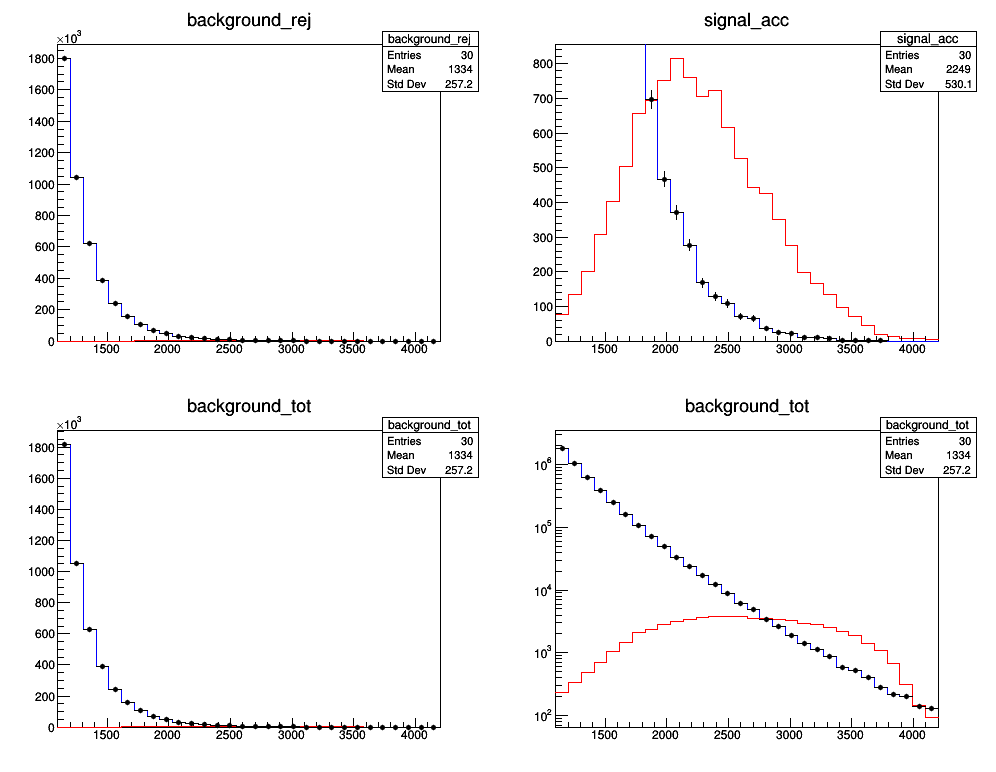

In [11]:
# plot background, signal, data
c = rt.TCanvas('c','c',1000,800)
c.Divide(2,2)

c.cd(1)
background_hist_rej.SetLineColor(rt.kBlue)
background_hist_rej.Draw('hist')
signal_hist_rej.SetLineColor(rt.kRed)
signal_hist_rej.Draw('histsame')
data_hist_rej.SetLineColor(rt.kBlack)
data_hist_rej.SetMarkerColor(rt.kBlack)
data_hist_rej.SetMarkerStyle(20)
data_hist_rej.SetMarkerSize(0.5)
data_hist_rej.Draw('pezsame')

c.cd(2)
signal_hist_acc.SetLineColor(rt.kRed)
signal_hist_acc.Draw('hist')
background_hist_acc.SetLineColor(rt.kBlue)
background_hist_acc.Draw('histsame')

data_hist_acc.SetLineColor(rt.kBlack)
data_hist_acc.SetMarkerColor(rt.kBlack)
data_hist_acc.SetMarkerStyle(20)
data_hist_acc.SetMarkerSize(0.5)
data_hist_acc.Draw('pezsame')

c.cd(3)
background_hist_tot.SetLineColor(rt.kBlue)
background_hist_tot.Draw('hist')
signal_hist_tot.SetLineColor(rt.kRed)
signal_hist_tot.Draw('histsame')
data_hist_tot.SetLineColor(rt.kBlack)
data_hist_tot.SetMarkerColor(rt.kBlack)
data_hist_tot.SetMarkerStyle(20)
data_hist_tot.SetMarkerSize(0.5)
data_hist_tot.Draw('pezsame')

c.cd(4)
rt.gPad.SetLogy()
background_hist_tot.SetLineColor(rt.kBlue)
background_hist_tot.Draw('hist')
signal_hist_tot.SetLineColor(rt.kRed)
signal_hist_tot.Draw('histsame')
data_hist_tot.SetLineColor(rt.kBlack)
data_hist_tot.SetMarkerColor(rt.kBlack)
data_hist_tot.SetMarkerStyle(20)
data_hist_tot.SetMarkerSize(0.5)
data_hist_tot.Draw('pezsame')
c.Draw()

In [12]:
# set up workspace

datacard_ws = rt.TFile.Open(os.path.join(combine_dir,'datacard_ws.root'),'recreate')
w = rt.RooWorkspace('w','w')
x = rt.RooRealVar('x','x',min_bin,max_bin)
w.factory('x[%.1f,%.1f]'%(min_bin, max_bin))

acc_bin_functions = rt.RooArgList()
rej_bin_functions = rt.RooArgList()
w.factory('eff[%f,0,1]'%(background_hist_acc.Integral()/background_hist_rej.Integral()))
w.var('eff').setConstant(True)

empty_hist = rt.TH1D('empty_hist','empty_hist', n_bins, min_bin, max_bin)
for iBinX in range(1,n_bins+1):
    empty_hist.SetBinContent(iBinX,1)
    w.factory('crBin%i_In[%.1f]'%(iBinX,background_hist_rej.GetBinContent(iBinX)))
    w.factory('crBin%i[0,-100,100]'%(iBinX))
    w.var('crBin%i_In'%iBinX).setConstant(True)
    w.var('crBin%i'%iBinX).setConstant(False)
    w.factory("expr::crBin%iFunc('max(0,@0*pow(1.0+%f,@1))',crBin%i_In,crBin%i)"%(iBinX,1/rt.TMath.Sqrt(background_hist_rej.GetBinContent(iBinX)),iBinX,iBinX))
    w.factory("expr::bin%iFunc('max(0,@0*@1)',eff,crBin%iFunc)"%(iBinX,iBinX))
    rej_bin_functions.add(w.function('crBin%iFunc'%iBinX))
    acc_bin_functions.add(w.function('bin%iFunc'%iBinX))
    
qcd_rph_rej = rt.RooParametricHist('background_rej','background_acc',w.var('x'),rej_bin_functions,empty_hist)
qcd_rph_rej_norm = rt.RooAddition('background_rej_norm','background_rej_norm',rej_bin_functions)
qcd_rph_acc = rt.RooParametricHist('background_acc','background_acc',w.var('x'),acc_bin_functions,empty_hist)
qcd_rph_acc_norm = rt.RooAddition('background_acc_norm','background_acc_norm',acc_bin_functions)
getattr(w,'import')(qcd_rph_rej, rt.RooCmdArg())
getattr(w,'import')(qcd_rph_rej_norm, rt.RooFit.RecycleConflictNodes())
getattr(w,'import')(qcd_rph_acc, rt.RooCmdArg())
getattr(w,'import')(qcd_rph_acc_norm, rt.RooFit.RecycleConflictNodes())

ds_signal_acc = rt.RooDataHist('signal_acc','signal_acc',rt.RooArgList(w.var('x')),signal_hist_acc)
ds_signal_rej = rt.RooDataHist('signal_rej','signal_rej',rt.RooArgList(w.var('x')),signal_hist_rej)
getattr(w,'import')(ds_signal_acc, rt.RooCmdArg())
getattr(w,'import')(ds_signal_rej, rt.RooCmdArg())

ds_data_acc = rt.RooDataHist('data_obs_acc','data_obs_acc',rt.RooArgList(w.var('x')),data_hist_acc)
ds_data_rej = rt.RooDataHist('data_obs_rej','data_obs_rej',rt.RooArgList(w.var('x')),data_hist_rej)
getattr(w,'import')(ds_data_acc, rt.RooCmdArg())
getattr(w,'import')(ds_data_rej, rt.RooCmdArg())

datacard_ws.cd()
w.Write()
datacard_ws.Close()

w.Print('v')

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooParametricHist::background_rej
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooFormulaVar::crBin1Func for import of RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooRealVar::crBin1_In for import of RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooRealVar::crBin1 for import of RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooFormulaVar::crBin2Func for import of RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooRealVar::crBin2_In for import of RooAddition::background_rej_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) using existing copy of RooRealVa

In [13]:
# datacard template
# no background normalization uncertainty

datacard_ratio = \
'''
imax 1
jmax 1
kmax *
---------------
shapes * * datacard_ws.root w:$PROCESS_$CHANNEL w:$PROCESS_$CHANNEL_$SYSTEMATIC
---------------
bin {BIN}
observation {OBS}
------------------------------
bin             {BIN}      {BIN}
process         signal     background
process         0          1
rate            {SIGRATE}    {BKGRATE}
--------------------------------
lumi lnN 1.01 -
eff   flatParam
crBin1   flatParam
crBin2   flatParam
crBin3   flatParam
crBin4   flatParam
crBin5   flatParam
crBin6   flatParam
crBin7   flatParam
crBin8   flatParam
crBin9   flatParam
crBin10   flatParam
crBin11   flatParam
crBin12   flatParam
crBin13   flatParam
crBin14   flatParam
crBin15   flatParam
crBin16   flatParam
crBin17   flatParam
crBin18   flatParam
crBin19   flatParam
crBin20   flatParam
crBin21   flatParam
crBin22   flatParam
crBin23   flatParam
crBin24   flatParam
crBin25   flatParam
crBin26   flatParam
crBin27   flatParam
crBin28   flatParam
crBin29   flatParam
crBin30   flatParam
'''

In [14]:
# write datacard
datacard_ratio_acc = datacard_ratio.format(BIN='acc',
                          OBS=data_hist_acc.Integral(),
                          BKGRATE=1,
                          SIGRATE=signal_hist_acc.Integral())
print(datacard_ratio_acc)
with open(os.path.join(combine_dir,'datacard_ratio_acc.txt'),'w') as f:
    f.write(datacard_ratio_acc)
    
    
datacard_ratio_rej = datacard_ratio.format(BIN='rej',
                          OBS=data_hist_rej.Integral(),
                          BKGRATE=1,
                          SIGRATE=signal_hist_rej.Integral())
print(datacard_ratio_rej)
with open(os.path.join(combine_dir,'datacard_ratio_rej.txt'),'w') as f:
    f.write(datacard_ratio_rej)


imax 1
jmax 1
kmax *
---------------
shapes * * datacard_ws.root w:$PROCESS_$CHANNEL w:$PROCESS_$CHANNEL_$SYSTEMATIC
---------------
bin acc
observation 45939.0
------------------------------
bin             acc      acc
process         signal     background
process         0          1
rate            10136.0    1
--------------------------------
lumi lnN 1.01 -
eff   flatParam
crBin1   flatParam
crBin2   flatParam
crBin3   flatParam
crBin4   flatParam
crBin5   flatParam
crBin6   flatParam
crBin7   flatParam
crBin8   flatParam
crBin9   flatParam
crBin10   flatParam
crBin11   flatParam
crBin12   flatParam
crBin13   flatParam
crBin14   flatParam
crBin15   flatParam
crBin16   flatParam
crBin17   flatParam
crBin18   flatParam
crBin19   flatParam
crBin20   flatParam
crBin21   flatParam
crBin22   flatParam
crBin23   flatParam
crBin24   flatParam
crBin25   flatParam
crBin26   flatParam
crBin27   flatParam
crBin28   flatParam
crBin29   flatParam
crBin30   flatParam


imax 1
jmax 1
kmax *
---

In [16]:
card_rej = os.path.join(combine_dir,'datacard_ratio_rej.txt')
card_acc = os.path.join(combine_dir,'datacard_ratio_acc.txt')
card_ratio = os.path.join(combine_dir,'datacard_ratio.txt')
!combineCards.py rej=$card_rej acc=$card_acc > $card_ratio

# # get obseverved goodness of fit test statistic (signal strength = 0)
# !combine -M GoodnessOfFit --algo saturated --fixedSignalStrength 0 -d datacard_ratio.txt

# # get expected goodness of fit test statistic distribution from frequentist toys
# !combine -M GoodnessOfFit --algo saturated --fixedSignalStrength 0 -d datacard_ratio.txt -t 100 --toysFreq

# open file
obs_gof_file = uproot.open('higgsCombineTest.GoodnessOfFit.mH120.root')
obs_gof = obs_gof_file['limit'].arrays('limit')['limit'][0]

exp_gof_file = uproot.open('higgsCombineTest.GoodnessOfFit.mH120.123456.root')
exp_gof = exp_gof_file['limit'].arrays('limit')['limit']

# # get p-value
n_extreme = len(exp_gof[exp_gof > obs_gof])
n_total = len(exp_gof)
pval = 1.*n_extreme/n_total
print 'p-value = %.2f'%pval

exp_gof_hist = rt.TH1D('gof','gof',30,min(exp_gof)-10, max(exp_gof)+10)
exp_gof_hist_gt = rt.TH1D('gof_gt','gof_gt',30,min(exp_gof)-10, max(exp_gof)+10)
for g in exp_gof: 
    exp_gof_hist.Fill(g)
    if g > obs_gof: 
        exp_gof_hist_gt.Fill(g)
d = rt.TCanvas('d','d',500,400)
tleg = rt.TLegend(0.58,0.6,0.88,0.7)
tleg.SetLineWidth(0)
exp_gof_hist.Draw('hist')
exp_gof_hist_gt.SetFillColor(rt.kBlue-10)
exp_gof_hist_gt.Draw('fhistsame')
line = rt.TLine(obs_gof,0,obs_gof,exp_gof_hist.GetMaximum())
line.SetLineWidth(2)
line.Draw()
tleg.AddEntry(exp_gof_hist_gt,'p-value = %.2f'%pval)
tleg.Draw()
d.Draw()

In [56]:
print(card_ratio)

combine/qcd_signal_25pct_qr_train/qr_1pct/datacard_ratio.txt


In [57]:
# get significance for a range of signal cross sections
import os

orig_xsec = 10.
xsec_to_scan = np.logspace(-4,0,10)

for mu in xsec_to_scan/orig_xsec:    
    os.environ['MU'] = str(mu)
    !combine -M Significance --setParameters r=${MU} -d combine/qcd_signal_25pct_qr_train/qr_1pct/datacard_ratio.txt -t -1 -n mu_${MU}

 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Object crBin1Func is duplicated
Object crBin2Func is duplicated
Object crBin3Func is duplicated
Object crBin4Func is duplicated
Object crBin5Func is duplicated
Object crBin6Func is duplicated
Object crBin7Func is duplicated
Object crBin8Func is duplicated
Object crBin9Func is duplicated
Object crBin10Func is duplicated
Object crBin11Func is duplicated
Object crBin12Func is duplicated
Object crBin13Func is duplicated
Object crBin14Func is duplicated
Object crBin15Func is duplicated
Object crBin16Func is duplicated
Object crBin17Func is duplicated
Object crBin18Func is duplicated
Object crBin19Func is duplicated
Object crBin20Func is duplicated
Object crBin21Func is duplicated
Object crBin22Func is duplicated
Object crBin23Func is duplicated
Object crBin24Func is duplicated
Object crBin25Func is duplicated
Object crBin26Func is duplicated
Object crBin27Func is duplicated
Object crBin28Func is dup

Set Default Value of Parameter r To : 0.000215443

 -- Significance -- 
Significance: 0.022783
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Object crBin1Func is duplicated
Object crBin2Func is duplicated
Object crBin3Func is duplicated
Object crBin4Func is duplicated
Object crBin5Func is duplicated
Object crBin6Func is duplicated
Object crBin7Func is duplicated
Object crBin8Func is duplicated
Object crBin9Func is duplicated
Object crBin10Func is duplicated
Object crBin11Func is duplicated
Object crBin12Func is duplicated
Object crBin13Func is duplicated
Object crBin14Func is duplicated
Object crBin15Func is duplicated
Object crBin16Func is duplicated
Object crBin17Func is duplicated
Object crBin18Func is duplicated
Object crBin19Func is duplicated
Object crBin20Func is duplicated
Object crBin21Func is duplicated
Object crBin22Func is duplicated
Object crBin23Func is duplicated
Object crBin24Func is 

Set Default Value of Parameter r To : 0.0129155

 -- Significance -- 
Significance: 2.61667
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Object crBin1Func is duplicated
Object crBin2Func is duplicated
Object crBin3Func is duplicated
Object crBin4Func is duplicated
Object crBin5Func is duplicated
Object crBin6Func is duplicated
Object crBin7Func is duplicated
Object crBin8Func is duplicated
Object crBin9Func is duplicated
Object crBin10Func is duplicated
Object crBin11Func is duplicated
Object crBin12Func is duplicated
Object crBin13Func is duplicated
Object crBin14Func is duplicated
Object crBin15Func is duplicated
Object crBin16Func is duplicated
Object crBin17Func is duplicated
Object crBin18Func is duplicated
Object crBin19Func is duplicated
Object crBin20Func is duplicated
Object crBin21Func is duplicated
Object crBin22Func is duplicated
Object crBin23Func is duplicated
Object crBin24Func is dup

In [15]:
# open file
for mu in xsec_to_scan/orig_xsec:    
    xsec = mu*orig_xsec
    signif_file = uproot.open(os.path.join(combine_dir,'higgsCombinemu_%s.Significance.mH120.root'%str(mu)))
    signif = signif_file['limit'].arrays('limit')['limit'][0]
    pval = rt.RooStats.SignificanceToPValue(signif)
    print("{},".format(pval))

0.5,
0.5,
0.498152675907,
0.490911693965,
0.470226587585,
0.365273557938,
0.170042605669,
0.0044395972356,
1.07401237462e-12,
3.42340303871e-73,


# check just regular fit
!combine -M FitDiagnostics -d datacard_ratio.txt --plots -v 2

# accept region doesn't look great
from IPython.display import Image
Image(filename='acc_x_fit_b.png') 

# Without VAE

In [16]:
# prepare histograms and scale
background_hist_tot = rt.TH1D('background_tot','background_tot', n_bins, min_bin, max_bin)
signal_hist_tot = rt.TH1D('signal_tot','signal_tot', n_bins, min_bin, max_bin)
data_hist_tot = rt.TH1D('data_obs_tot','data_obs_tot', n_bins, min_bin, max_bin)

for i, b in enumerate(h_t_bin_content):
    background_hist_tot.SetBinContent(i+1, b)
    data_hist_tot.SetBinContent(i+1, b)
for i, s in enumerate(h_t_signal):
    signal_hist_tot.SetBinContent(i+1, s)
    

Warning in <TROOT::Append>: Replacing existing TH1: background_tot (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: signal_tot (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data_obs_tot (Potential memory leak).


In [17]:
histos = {}
datacard_hist = rt.TFile.Open(os.path.join(combine_dir,'datacard_hist.root'),'recreate')
datacard_hist.cd()
histos['signal_tot'] = signal_hist_tot
histos['qcd_tot'] = background_hist_tot
histos['data_obs_tot'] = data_hist_tot

histos['signal_acc'] = signal_hist_acc
histos['qcd_acc'] = background_hist_acc
histos['data_obs_acc'] = data_hist_acc
histos['signal_rej'] = signal_hist_rej
histos['qcd_rej'] = background_hist_rej
histos['data_obs_rej'] = data_hist_rej

for key, histo in histos.iteritems():
    datacard_hist.cd()
    histo.Write(key)
    if 'qcd' not in key:
        ds = rt.RooDataHist(key,key,rt.RooArgList(w.var('x')),histo)
        getattr(w,'import')(ds, rt.RooCmdArg())
datacard_hist.Close()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(signal_rej): fit range of variable x expanded to nearest bin boundaries: [1100,4200] --> [1100,4200]
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset signal_rej
[#0] ERROR:ObjectHandling -- RooWorkspace::import(w) ERROR dataset with name signal_rej already exists in workspace, import aborted
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data_obs_rej): fit range of variable x expanded to nearest bin boundaries: [1100,4200] --> [1100,4200]
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data_obs_rej
[#0] ERROR:ObjectHandling -- RooWorkspace::import(w) ERROR dataset with name data_obs_rej already exists in workspace, import aborted
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data_obs_tot): fit range of variable x expanded to nearest bin boundaries: [1100,4200] --> [1100,4200]
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data_obs_tot
[#1] INFO:DataHandlin

In [18]:
datacard = \
'''
imax 1
jmax 1
kmax *
---------------
shapes * * datacard_hist.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC
---------------
bin {BIN}
observation {OBS}
------------------------------
bin             {BIN}      {BIN}
process         {BSM}     qcd
process         0          1
rate            {BSMRATE}    {QCDRATE}
--------------------------------
lumi     lnN    1.10       1.10
bgnorm   lnN    1.00       1.30
* autoMCStats 0 0 1
'''

datacard_tot = datacard.format(BIN='tot',
                          OBS=data_hist_tot.Integral(),
                          QCDRATE=background_hist_tot.Integral(),
                          BSM='signal',
                          BSMRATE=signal_hist_tot.Integral())
print(datacard_tot)
with open(os.path.join(combine_dir,'datacard_tot.txt'),'w') as f:
    f.write(datacard_tot)
    
    
datacard_acc = datacard.format(BIN='acc',
                          OBS=data_hist_acc.Integral(),
                          QCDRATE=background_hist_acc.Integral(),
                          BSM='signal',
                          BSMRATE=signal_hist_acc.Integral())
print(datacard_acc)

with open(os.path.join(combine_dir,'datacard_acc.txt'),'w') as f:
    f.write(datacard_acc)
    
datacard_rej = datacard.format(BIN='rej',
                          OBS=data_hist_rej.Integral(),
                          QCDRATE=background_hist_rej.Integral(),
                          BSM='signal',
                          BSMRATE=signal_hist_rej.Integral())
print(datacard_rej)
with open(os.path.join(combine_dir,'datacard_rej.txt'),'w') as f:
    f.write(datacard_rej)
    


imax 1
jmax 1
kmax *
---------------
shapes * * datacard_hist.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC
---------------
bin tot
observation 4628116.0
------------------------------
bin             tot      tot
process         signal     qcd
process         0          1
rate            62942.0    4628116.0
--------------------------------
lumi     lnN    1.10       1.10
bgnorm   lnN    1.00       1.30
* autoMCStats 0 0 1


imax 1
jmax 1
kmax *
---------------
shapes * * datacard_hist.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC
---------------
bin acc
observation 45939.0
------------------------------
bin             acc      acc
process         signal     qcd
process         0          1
rate            10136.0    45939.0
--------------------------------
lumi     lnN    1.10       1.10
bgnorm   lnN    1.00       1.30
* autoMCStats 0 0 1


imax 1
jmax 1
kmax *
---------------
shapes * * datacard_hist.root $PROCESS_$CHANNEL $PROCESS_$CHANNEL_$SYSTEMATIC
--------------

In [58]:
print(os.path.join(combine_dir,'datacard_tot.txt'))

combine/qcd_signal_25pct_qr_train/qr_1pct/datacard_tot.txt


In [19]:
import os

orig_xsec = 10.
xsec_to_scan = np.logspace(-4,0,10)

for mu in xsec_to_scan/orig_xsec:    
    os.environ['MU'] = str(mu)
    !combine -M Significance --setParameters r=${MU} -d combine/qcd_signal_25pct_qr_train/qr_1pct/datacard_tot.txt -t -1 -n tot_mu_${MU}

 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked processes    
1          1050431.000000  1024.905361     Unweighted events, alpha=1.000316
  => Total parameter prop_bintot_bin1[0.00,-7.00,7

Set Default Value of Parameter r To : 1e-05

 -- Significance -- 
Significance: 0
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked processes    
1    

Set Default Value of Parameter r To : 2.78256e-05

 -- Significance -- 
Significance: 0
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked processes    

Set Default Value of Parameter r To : 7.74264e-05

 -- Significance -- 
Significance: 0.0108487
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked proce

Set Default Value of Parameter r To : 0.000215443

 -- Significance -- 
Significance: 0.0319021
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked proce

Set Default Value of Parameter r To : 0.000599484

 -- Significance -- 
Significance: 0.096693
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked proces

Set Default Value of Parameter r To : 0.0016681

 -- Significance -- 
Significance: 0.141272
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked processe

Set Default Value of Parameter r To : 0.00464159

 -- Significance -- 
Significance: 0.862908
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked process

Set Default Value of Parameter r To : 0.0129155

 -- Significance -- 
Significance: 2.39323
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel tot will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_bintot
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1814981.000000  1347.212307     total sum                     
0          1814743.000000  1347.123974     excluding marked processes    
0          1814743.000000  1347.123974     Unweighted events, alpha=1.000131
  => Total parameter prop_bintot_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1050763.000000  1025.067315     total sum                     
1          1050431.000000  1024.905361     excluding marked processes

21         889.000000      29.816103       Unweighted events, alpha=3.817773
  => Total parameter prop_bintot_bin21[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
22         2762.000000     52.554733       total sum                     
22         587.000000      24.228083       excluding marked processes    
22         587.000000      24.228083       Unweighted events, alpha=4.705281
  => Total parameter prop_bintot_bin22[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
23         2399.000000     48.979588       total sum                     
23         528.000000      22.978251       excluding marked processes    
23         528.000000      22.978251       Unweighted events, alpha=4.543561
  => Total parameter prop_bintot_bin23[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
24         1826.000000     42.731721     

Set Default Value of Parameter r To : 0.1

 -- Significance -- 
Significance: 17.9467
Done in 0.00 min (cpu), 0.00 min (real)


In [20]:
# open file
for mu in xsec_to_scan/orig_xsec:    
    xsec = mu*orig_xsec
    signif_file = uproot.open(os.path.join(combine_dir,'higgsCombinetot_mu_%s.Significance.mH120.root'%str(mu)))
    signif = signif_file['limit'].arrays('limit')['limit'][0]
    pval = rt.RooStats.SignificanceToPValue(signif)
    print("{},".format(pval))

0.5,
0.5,
0.49567209226,
0.487275046093,
0.461485091185,
0.443827531243,
0.194093978562,
0.00835048910021,
2.0571838788e-11,
2.54664793046e-72,


In [ ]:
print(os.path.join(combine_dir,)

In [21]:
import os
!combineCards.py acc=datacard_acc.txt rej=datacard_rej.txt > datacard_comb.txt

orig_xsec = 10.
xsec_to_scan = np.logspace(-4,0,10)

for mu in xsec_to_scan/orig_xsec:    
    os.environ['MU'] = str(mu)
    !combine -M Significance --setParameters r=${MU} -d datacard_comb.txt -t -1 -n comb_mu_${MU}

 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes    
1          10493.000000    102.435345      Unweighted events, alpha=1.012770
  => Total parameter prop_binacc_bin1[0.00,-7.00,7

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 1e-05

 -- Significance -- 
Significance: 0.0820492
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes  

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 2.78256e-05

 -- Significance -- 
Significance: 0.140718
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked proces

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 7.74264e-05

 -- Significance -- 
Significance: 0.25147
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked process

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.000215443

 -- Significance -- 
Significance: 0.440487
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked proces

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.000599484

 -- Significance -- 
Significance: 0.770426
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked proces

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.0016681

 -- Significance -- 
Significance: 1.36548
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.00464159

 -- Significance -- 
Significance: 2.5039
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.0129155

 -- Significance -- 
Significance: 4.91118
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.0359381

 -- Significance -- 
Significance: 10.5827
Done in 0.00 min (cpu), 0.00 min (real)
 <<< Combine >>> 
>>> method used is Significance
>>> random number generator seed is 123456
Channel acc will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binacc
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          17998.000000    134.156625      total sum                     
0          17920.000000    133.865604      excluding marked processes    
0          17920.000000    133.865604      Unweighted events, alpha=1.004353
  => Total parameter prop_binacc_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          10627.000000    103.087342      total sum                     
1          10493.000000    102.435345      excluding marked processes

Channel rej will use autoMCStats with settings: event-threshold=0, include-signal=0, hist-mode=1
Analysing bin errors for: prop_binrej
Poisson cut-off: 0
Processes excluded for sums: signal
Bin        Contents        Error           Notes                         
0          1796983.000000  1340.515945     total sum                     
0          1796823.000000  1340.456266     excluding marked processes    
0          1796823.000000  1340.456266     Unweighted events, alpha=1.000089
  => Total parameter prop_binrej_bin0[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------
1          1040136.000000  1019.870580     total sum                     
1          1039938.000000  1019.773504     excluding marked processes    
1          1039938.000000  1019.773504     Unweighted events, alpha=1.000190
  => Total parameter prop_binrej_bin1[0.00,-7.00,7.00] to be gaussian constrained
------------------------------------------------------------


Set Default Value of Parameter r To : 0.1

 -- Significance -- 
Significance: 24.6977
Done in 0.00 min (cpu), 0.00 min (real)


In [22]:
# open file
for mu in xsec_to_scan/orig_xsec:    
    xsec = mu*orig_xsec
    signif_file = uproot.open('higgsCombinecomb_mu_%s.Significance.mH120.root'%str(mu))
    signif = signif_file['limit'].arrays('limit')['limit'][0]
    pval = rt.RooStats.SignificanceToPValue(signif)
    print("{},".format(pval))

0.467303780301,
0.44404627904,
0.400725309368,
0.329792283223,
0.220523683659,
0.0860505384397,
0.00614170228022,
4.52645637084e-07,
1.79158211839e-26,
5.65907796863e-135,
